# Implement the k-means algorithm and apply your implementation on the given dataset, which contains a set of 2-D points.


## Import Libraries

In [1]:
import scipy.io
import pandas as pd
import matplotlib.pyplot as plt
import random
import numpy as np
import time
import warnings
warnings.filterwarnings("ignore")

## Function to assign data to clusters using minimum euclidean distance to centroids.


In [2]:
### Input: Data and Centroids
### Output: Assigned Clusters
def assign(data,Centroids):

    EuclideanDistance = np.array([]).reshape(m, 0)
    for k in range(K):
        dist = np.sum((data - Centroids[:, k]) ** 2, axis=1)
        EuclideanDistance = np.c_[EuclideanDistance, dist]
    Clusters = np.argmin(EuclideanDistance, axis=1) + 1

    return(Clusters)

## Function to map clusters and the respective data points

In [3]:
# Input: data and number of clusters
# Output: Map Cluster to Data Points
def map_cluster_data(data, K):
    clusterDataMap = {}
    for k in range(K):
        clusterDataMap[k + 1] = np.array([]).reshape(2, 0)

    for i in range(m):
        clusterDataMap[clusters[i]] = np.c_[clusterDataMap[clusters[i]], data.iloc[i]]

    for k in range(K):
        clusterDataMap[k + 1] = clusterDataMap[k + 1].T

    return(clusterDataMap)

## Function to calculate centroid

In [4]:
# Input: Map with cluster and Data Points and Centroids
# Output: New centroids which are calculated from the data mapping of clusters
def centroid(clusterDataMap,Centroids):

    for k in range(K):
        Centroids[:, k] = np.mean(clusterDataMap[k + 1], axis=0)

    return(Centroids)

## Strategy 1 - Cluster Initialization
### Function to initialize cluster centroids randomly

In [5]:
# Input: Data and Number of Clusters
# Output: Centroids
def initialize_centroids(data, K):
    Centroids = np.array([]).reshape(data.shape[1], 0)
    for i in range(K):
        randIndex = random.randint(0, data.shape[0] - 1)
        Centroids = np.c_[Centroids, data.iloc[randIndex]]
    return(Centroids)

## Strategy 2 - Cluster Initialization
### Function to initialize cluster centroids (farthest dentroid from previous)

In [6]:
# Input: Data and Number of Clusters
# Output: Centroids
def initialize_centroids_strategy2(data, K):
    Centroids = np.array([]).reshape(data.shape[1], 0)
    for i in range(K):
        if i ==0:
            rand = random.randint(0, data.shape[0] - 1)
            Centroids = np.c_[Centroids, data.iloc[rand]]
            # centroidIndexes.append(rand)
            data=data.drop(data.index[rand])
        else:
            centroidMean = np.mean(Centroids,axis=1)
            index = np.argmax(np.sqrt(np.sum((data - centroidMean) ** 2, axis=1)),axis=0)
            # centroidIndexes.append(index)
            Centroids = np.c_[Centroids, data.iloc[index]]
            data = data.drop(data.index[index])
    return(Centroids)

## Read Data

In [7]:
Numpyfile= scipy.io.loadmat("./data/AllSamples.mat")
data = pd.DataFrame(Numpyfile['AllSamples'])
data.columns=['x1','x2']
m = data.shape[0]
n = data.shape[1]

In [8]:
# Initialize Prameters
n_iter = 50

# Initialize plot parameters
color=['red','blue','green','cyan','magenta','grey', 'yellow', 'orange', 'black', 'purple']
labels=['cluster1','cluster2','cluster3','cluster4','cluster5','cluster6', 'cluster7','cluster8','cluster9','cluster10']


## Strategy 1: First Iteration

In [9]:
#
print("Strategy 1 : First Iteration")
#                  ********* Strategy 1 ************
# Randomly pick the initial centers from the given samples.

# First run with cluster initiation
# Run K-Means with clusters in the range of 2 - 10
WCSS_array=np.array([])
for K in range(2,11):
    Centroids = initialize_centroids(data, K)
    for i in range(n_iter):
        clusters = assign(data, Centroids)
        clusterDataMap = map_cluster_data(data, K)
        Centroids = centroid(clusterDataMap, Centroids)
    wcss = 0
    # Compute Objective functions
    for k in range(K):
        wcss += np.sum((clusterDataMap[k + 1] - Centroids[:, k]) ** 2)
    WCSS_array = np.append(WCSS_array, wcss)

Strategy 1 : First Iteration


In [10]:
WCSS_array

array([1921.03348586, 1338.17037195, 1115.53448124,  738.7896281 ,
        467.65908827,  362.86608881,  313.38070203,  256.34971248,
        215.94548928])

## Plot the objective function

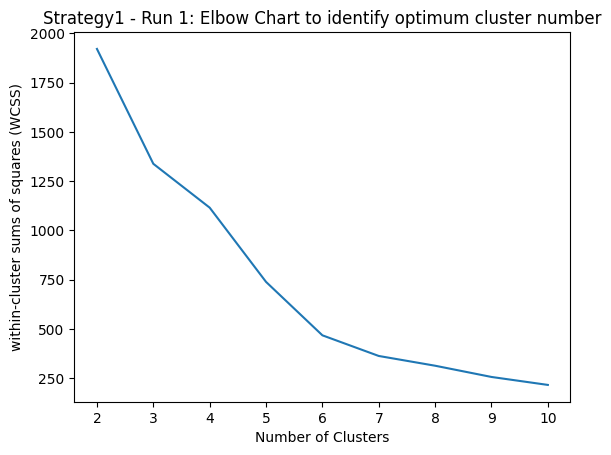

In [11]:

KMeans_array=np.arange(2,11,1)
plt.figure()
plt.plot(KMeans_array,WCSS_array)
plt.xlabel('Number of Clusters')
plt.ylabel('within-cluster sums of squares (WCSS)')
plt.title('Strategy1 - Run 1: Elbow Chart to identify optimum cluster number')
plt.show()

## Strategy 1 : Second Iteration

In [12]:
# Second run with different cluster initiation
# Run K-Means with clusters in the range of 2 - 10
#WCSS --> Within cluster sum of squared errors
WCSS_array=np.array([])
for K in range(2,11):
    Centroids = initialize_centroids(data, K)
    for i in range(n_iter):
        clusters = assign(data, Centroids)
        clusterDataMap = map_cluster_data(data, K)
        Centroids = centroid(clusterDataMap, Centroids)
    wcss = 0
    # Compute Objective functions
    for k in range(K):
        wcss += np.sum((clusterDataMap[k + 1] - Centroids[:, k]) ** 2)
    WCSS_array = np.append(WCSS_array, wcss)

## Plot the objective function

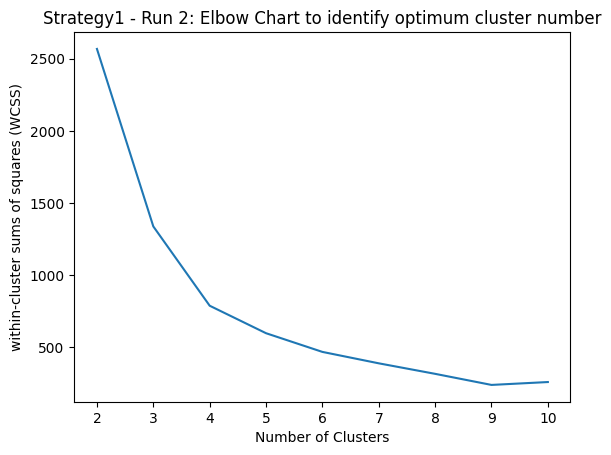

In [14]:
KMeans_array=np.arange(2,11,1)
plt.figure()
plt.plot(KMeans_array,WCSS_array)
plt.xlabel('Number of Clusters')
plt.ylabel('within-cluster sums of squares (WCSS)')
plt.title('Strategy1 - Run 2: Elbow Chart to identify optimum cluster number')
plt.show()

## Strategy 2 : First Iteration
Strategy 2: pick the first center randomly; for the i-th center (i>1),
choose a sample (among all possible samples) such that the average distance of this
chosen one to all previous (i-1) centers is maximal.


In [15]:
# First run with cluster initiation
# Run K-Means with clusters in the range of 2 - 10
WCSS_array=np.array([])
for K in range(2,11):
    Centroids = initialize_centroids_strategy2(data, K)
    for i in range(n_iter):
        clusters = assign(data, Centroids)
        clusterDataMap = map_cluster_data(data, K)
        Centroids = centroid(clusterDataMap, Centroids)
    wcss = 0
    for k in range(K):
        wcss += np.sum((clusterDataMap[k + 1] - Centroids[:, k]) ** 2)
    WCSS_array = np.append(WCSS_array, wcss)

## Plot the objective function: Strategy 2 - First initialization

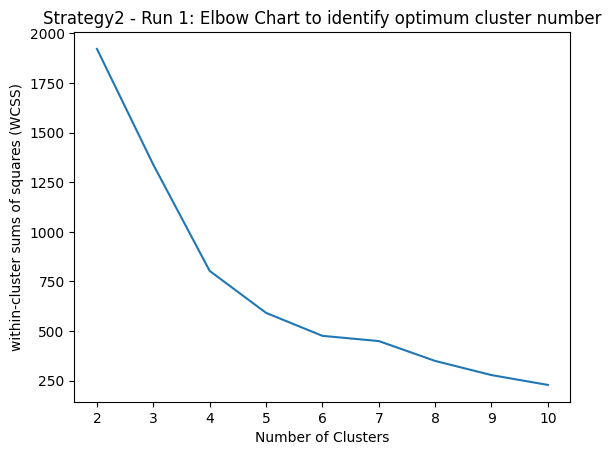

In [16]:
KMeans_array=np.arange(2,11,1)
plt.figure()
plt.plot(KMeans_array,WCSS_array)
plt.xlabel('Number of Clusters')
plt.ylabel('within-cluster sums of squares (WCSS)')
plt.title('Strategy2 - Run 1: Elbow Chart to identify optimum cluster number')
plt.show()

## Strategy 2 : Second Iteration

In [17]:
# Second run with different cluster initiation
# Run K-Means with clusters in the range of 2 - 10
WCSS_array=np.array([])
for K in range(2,11):
    Centroids = initialize_centroids_strategy2(data, K)
    for i in range(n_iter):
        clusters = assign(data, Centroids)
        clusterDataMap = map_cluster_data(data, K)
        Centroids = centroid(clusterDataMap, Centroids)
    wcss = 0
    for k in range(K):
        wcss += np.sum((clusterDataMap[k + 1] - Centroids[:, k]) ** 2)
    WCSS_array = np.append(WCSS_array, wcss)

## Plot the objective function: Strategy 2 - Second initialization

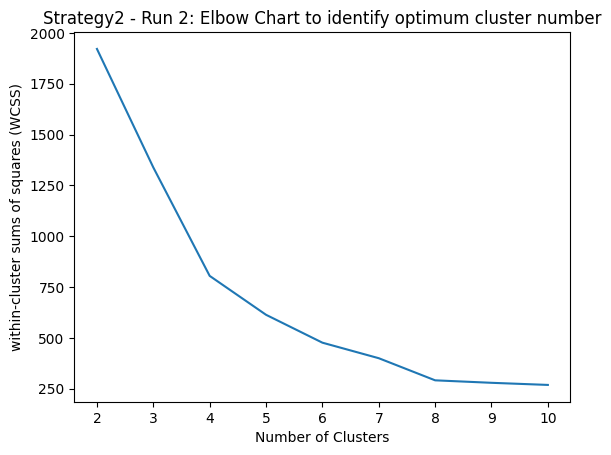

In [18]:
KMeans_array=np.arange(2,11,1)
plt.figure()
plt.plot(KMeans_array,WCSS_array)
plt.xlabel('Number of Clusters')
plt.ylabel('within-cluster sums of squares (WCSS)')
plt.title('Strategy2 - Run 2: Elbow Chart to identify optimum cluster number')
plt.show()